In [2]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix


In [5]:
# Load Dataset

df = pd.read_csv(r"C:\Users\Muhammad Ali\Desktop\Devs Hub\loan_prediction.csv")

print("Dataset Loaded Successfully\n")
print(df.head())
print("\nMissing Values Before Cleaning:\n")
print(df.isnull().sum())



Dataset Loaded Successfully

    Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001003   Male     Yes          1      Graduate            No   
1  LP001005   Male     Yes          0      Graduate           Yes   
2  LP001006   Male     Yes          0  Not Graduate            No   
3  LP001008   Male      No          0      Graduate            No   
4  LP001013   Male     Yes          0  Not Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             4583             1508.0       128.0             360.0   
1             3000                0.0        66.0             360.0   
2             2583             2358.0       120.0             360.0   
3             6000                0.0       141.0             360.0   
4             2333             1516.0        95.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Rural           N  
1             1.0         Urban      

In [7]:
# Identify numeric and categorical columns
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
cat_cols = df.select_dtypes(include=['object']).columns

# Fill numeric columns with median
df[num_cols] = df[num_cols].fillna(df[num_cols].median())

# Fill categorical columns with mode
df[cat_cols] = df[cat_cols].fillna(df[cat_cols].mode().iloc[0])

print("\nMissing Values After Cleaning:\n")
print(df.isnull().sum())



Missing Values After Cleaning:

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64


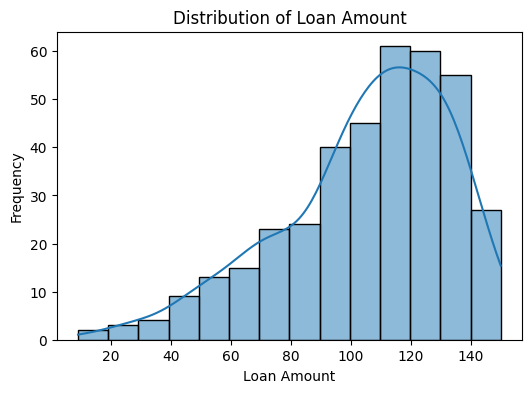

In [23]:
# Exploratory Data Analysis

plt.figure(figsize=(6,4))
sns.histplot(df['LoanAmount'], kde=True)
plt.title("Distribution of Loan Amount")
plt.xlabel("Loan Amount")
plt.ylabel("Frequency")
plt.show()

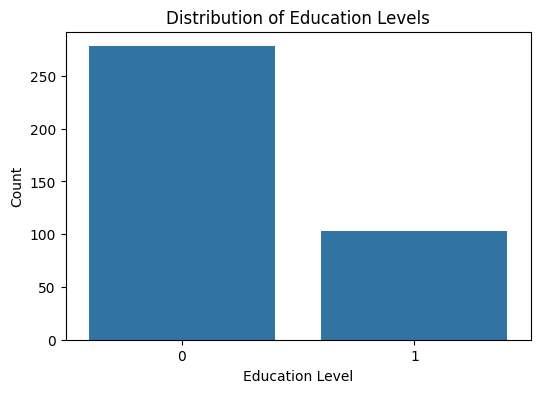

In [22]:
plt.figure(figsize=(6,4))
sns.countplot(x='Education', data=df)
plt.title("Distribution of Education Levels")
plt.xlabel("Education Level")
plt.ylabel("Count")
plt.show()

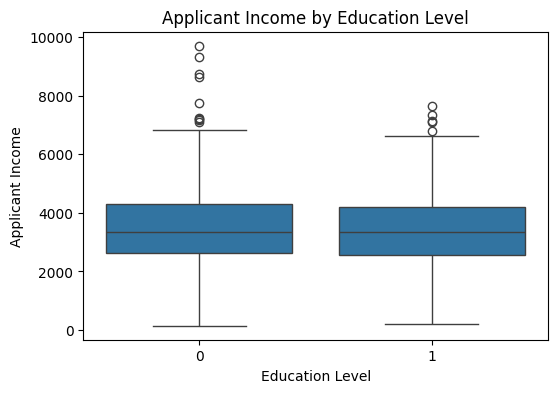

In [24]:
plt.figure(figsize=(6,4))
sns.boxplot(x='Education', y='ApplicantIncome', data=df)
plt.title("Applicant Income by Education Level")
plt.xlabel("Education Level")
plt.ylabel("Applicant Income")
plt.show()


In [11]:
# Encoding Categorical Data

label_encoder = LabelEncoder()

for col in cat_cols:
    df[col] = label_encoder.fit_transform(df[col])

print("Categorical Encoding Completed.")


Categorical Encoding Completed.


In [13]:
# Separate features and target

X = df.drop('Loan_Status', axis=1)
y = df['Loan_Status']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)

# Scale the feature values
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Data Split and Scaling Completed.")


Data Split and Scaling Completed.


In [15]:
# Logistic Regression Model

log_model = LogisticRegression(max_iter=5000)
log_model.fit(X_train_scaled, y_train)

y_pred_log = log_model.predict(X_test_scaled)

print("Logistic Regression Model Trained Successfully.")


Logistic Regression Model Trained Successfully.


In [17]:
# Decision Tree Model

dt_model = DecisionTreeClassifier(max_depth=5, random_state=42)
dt_model.fit(X_train, y_train)

y_pred_dt = dt_model.predict(X_test)

print("Decision Tree Model Trained Successfully.")


Decision Tree Model Trained Successfully.


In [18]:
# Model Evaluation

print("===== Logistic Regression Results =====")
print("Accuracy:", accuracy_score(y_test, y_pred_log))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_log))

print("\n===== Decision Tree Results =====")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))


===== Logistic Regression Results =====
Accuracy: 0.8229166666666666
Confusion Matrix:
 [[12 17]
 [ 0 67]]

===== Decision Tree Results =====
Accuracy: 0.8020833333333334
Confusion Matrix:
 [[15 14]
 [ 5 62]]
